In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf,keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense, concatenate, Flatten
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
from scipy.special import expit

In [2]:
df_train=pd.read_csv('train_EU.csv')
df_test=pd.read_csv("testdata_EU.csv")
print('df_train',df_train.shape)
print('df_test',df_test.shape)

df_train (12000, 306)
df_test (6000, 306)


In [3]:
print(df_train.columns[305])

GSNR_1


In [4]:
print(df_train.head)

<bound method NDFrame.head of         Power_1   Power_2   Power_3   Power_4   Power_5   Power_6   Power_7  \
0      0.000000  0.000000  0.000007  0.000007  0.000007  0.000000  0.000007   
1      0.000000  0.000007  0.000000  0.000007  0.000000  0.000007  0.000000   
2      0.000000  0.000000  0.000000  0.000007  0.000000  0.000000  0.000000   
3      0.000007  0.000007  0.000007  0.000007  0.000007  0.000000  0.000000   
4      0.000000  0.000000  0.000007  0.000000  0.000007  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
11995  0.000000  0.000010  0.000000  0.000000  0.000010  0.000010  0.000000   
11996  0.000000  0.000011  0.000000  0.000011  0.000000  0.000011  0.000011   
11997  0.000000  0.000000  0.000011  0.000000  0.000000  0.000011  0.000011   
11998  0.000011  0.000000  0.000011  0.000011  0.000000  0.000011  0.000000   
11999  0.000000  0.000011  0.000011  0.000000  0.000011  0.000011  0.000011   

        Power_8   Pow

In [44]:
X = df_train.iloc[:, :-1]  # Select all columns except the last one
y=df_train["GSNR_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#======Converting to Arrays=========
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
#========end=======================
#=======Reshaping Labels===========
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
#======end========================
#===========printing Shapes======
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9600, 305)
(9600, 1)
(2400, 305)
(2400, 1)


In [45]:
#===========Feature Normalization=================================
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [46]:
#===========Label Normalization==================================
label_scaler=MinMaxScaler()
label_scaler.fit(y_train)
y_train=label_scaler.transform(y_train)
y_test=label_scaler.transform(y_test)

In [47]:
#=============== Loading Pretrained Model============================
pretrained_model = keras.models.load_model('test_USA.h5')
pretrained_model.pop()
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 305)               93330     
                                                                 
 dense_1 (Dense)             (None, 256)               78336     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
Total params: 215,426
Trainable params: 215,426
Non-trai

In [48]:
model=Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='linear'))
pretrained_model.trainable=False
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 16)                215426    
                                                                 
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 216,579
Trainable params: 1,153
Non-trainable params: 215,426
_________________________________________________________________


In [49]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)#0.001
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [50]:
model_history=model.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0],validation_data=(X_test,y_test)
          ,verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.0994 - val_loss: 0.0904 - 678ms/epoch - 678ms/step
Epoch 2/100
1/1 - 0s - loss: 0.0922 - val_loss: 0.0845 - 82ms/epoch - 82ms/step
Epoch 3/100
1/1 - 0s - loss: 0.0862 - val_loss: 0.0798 - 66ms/epoch - 66ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0813 - val_loss: 0.0761 - 84ms/epoch - 84ms/step
Epoch 5/100
1/1 - 0s - loss: 0.0774 - val_loss: 0.0732 - 101ms/epoch - 101ms/step
Epoch 6/100
1/1 - 0s - loss: 0.0744 - val_loss: 0.0711 - 104ms/epoch - 104ms/step
Epoch 7/100
1/1 - 0s - loss: 0.0721 - val_loss: 0.0695 - 82ms/epoch - 82ms/step
Epoch 8/100
1/1 - 0s - loss: 0.0705 - val_loss: 0.0684 - 83ms/epoch - 83ms/step
Epoch 9/100
1/1 - 0s - loss: 0.0693 - val_loss: 0.0676 - 95ms/epoch - 95ms/step
Epoch 10/100
1/1 - 0s - loss: 0.0683 - val_loss: 0.0668 - 100ms/epoch - 100ms/step
Epoch 11/100
1/1 - 0s - loss: 0.0675 - val_loss: 0.0660 - 96ms/epoch - 96ms/step
Epoch 12/100
1/1 - 0s - loss: 0.0666 - val_loss: 0.0651 - 100ms/epoch - 100ms/step
Epoch 13/100
1/1 - 0s - los

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>)

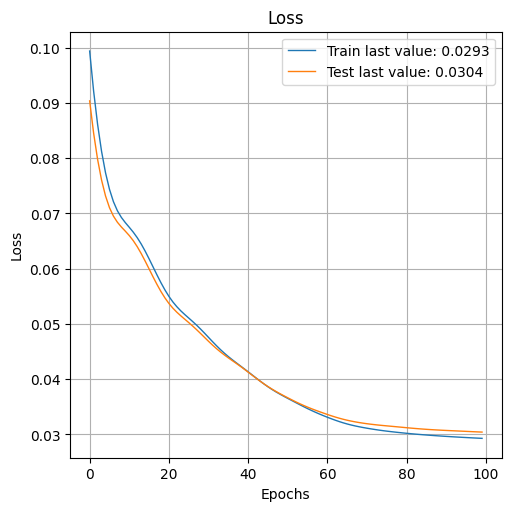

In [51]:
from plot_keras_history import plot_history
plot_history(model_history,show_standard_deviation=False,
    show_average=True)

In [52]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred,y_test)
print(mse)

75/75 [==============================] - 0s 3ms/step
0.030434789204501513
